# H1B VISA:

The H-1B is a visa in the United States under the Immigration and Nationality Act,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('h1b_kaggle.csv')
data.head(2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843


In [17]:
data['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan], dtype=object)

In [15]:
status = data['CASE_STATUS'].value_counts()

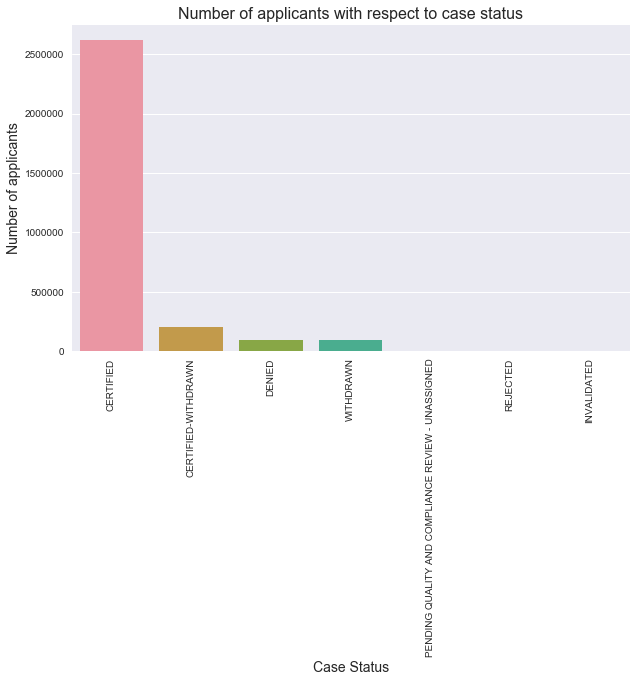

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(status.index, status.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Case Status', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to case status", fontsize=16)
plt.show()

In [41]:
employer = data['EMPLOYER_NAME'].value_counts()
employer = employer[(employer.values > 5000)]

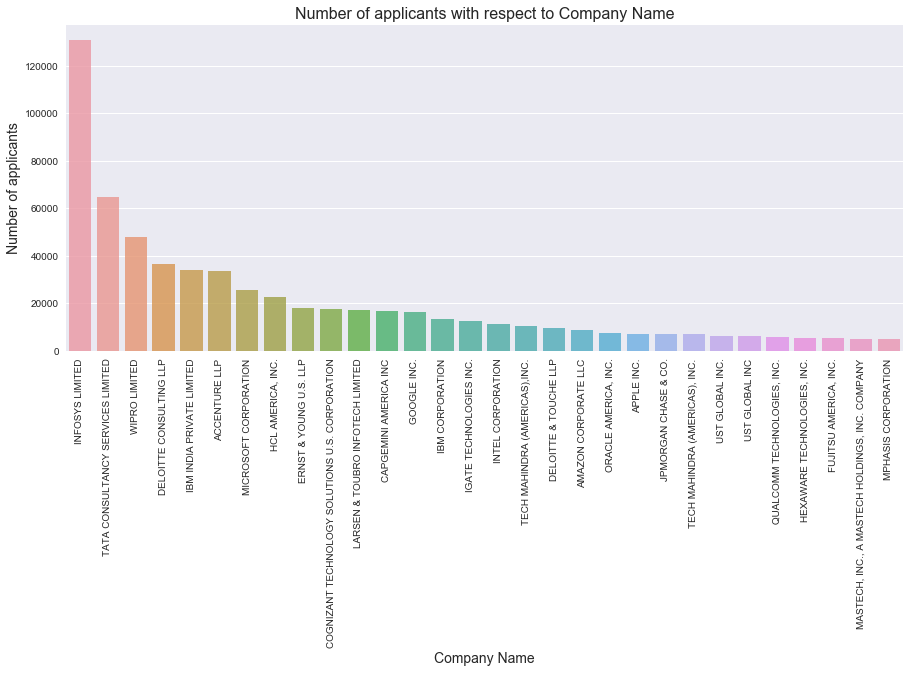

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(employer.index, employer.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to Company Name", fontsize=16)
plt.show()

### Looks like Infosys job is gonna land you in the Unites States

In [43]:
job = data['JOB_TITLE'].value_counts()
job = job[(job.values > 6000)]

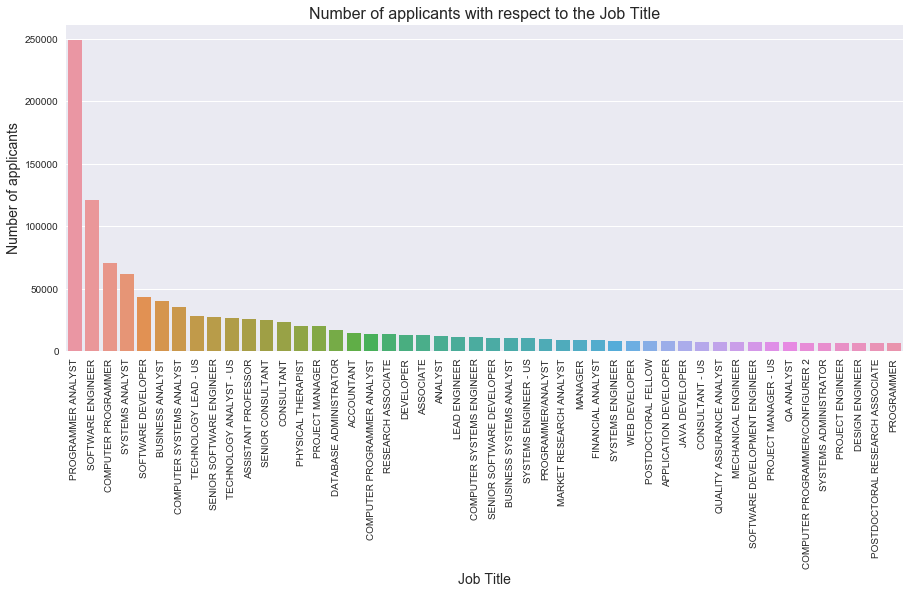

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(job.index, job.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the Job Title", fontsize=16)
plt.show()

In [55]:
full = data['FULL_TIME_POSITION'].value_counts()

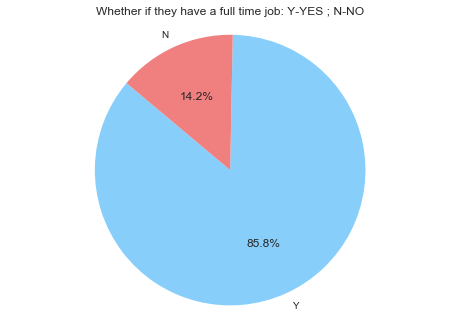

In [63]:
colors = ['lightskyblue', 'lightcoral']
plt.pie(full.values, labels=full.index, colors=colors, autopct='%1.1f%%',startangle=140)
plt.title('Whether if they have a full time job: Y-YES ; N-NO')
plt.axis('equal')
plt.show()

### Applications Certified with respect to years

In [81]:
years = sorted(list((data['YEAR'].unique())))
##### Remove the NAN element ####
years.pop()
##### Convert float to integer ####
years = [ int(x) for x in years ]

In [88]:
passed = data[(data['CASE_STATUS']=='CERTIFIED')]
values = list(passed.groupby('YEAR').size())

In [101]:
sum(values) == len(passed)

True

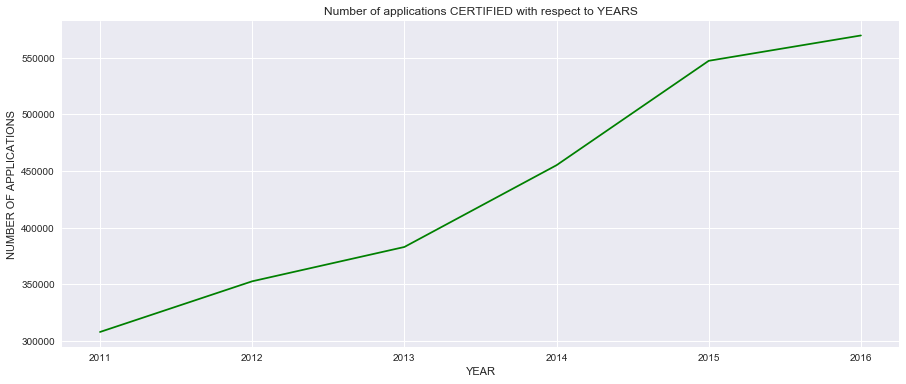

In [95]:
plt.figure(figsize=(15,6))
plt.plot(years,values, color = 'g')
plt.title('Number of applications CERTIFIED with respect to YEARS')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF APPLICATIONS')
plt.show()

### The Number of VISA approvals have increased exponentially over the years (Obviously) except from 2015-2016 where there's only slight increase maybe because of the US presidential election results 

In [106]:
failed = data[(data['CASE_STATUS']=='DENIED')]
denied = list(failed.groupby('YEAR').size())

In [109]:
len(failed) == sum(denied)

True

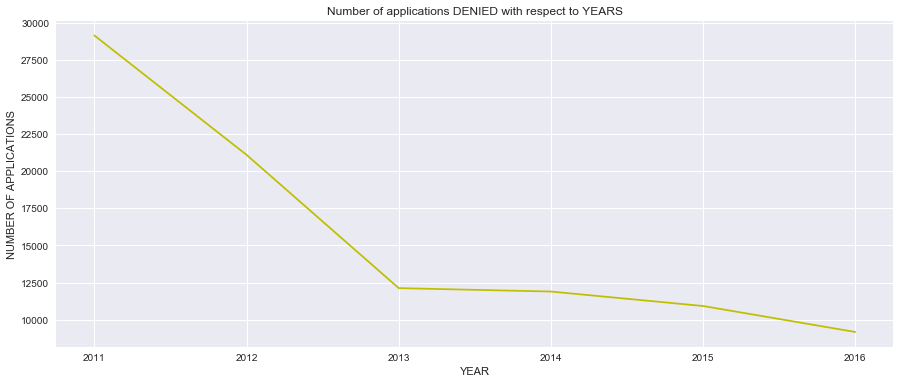

In [114]:
plt.figure(figsize=(15,6))
plt.plot(years,denied, color = 'y')
plt.title('Number of applications DENIED with respect to YEARS')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF APPLICATIONS')
plt.show()

## Number of denied applications are reducing.......NOICE WORK FELLAS

In [120]:
np.mean(data['PREVAILING_WAGE'])

146998.4319151606

## Prevailing wage: 

In government contracting, a prevailing wage is defined as the hourly wage, usual benefits and overtime, paid to the majority of workers, laborers, and mechanics within a particular area. Prevailing wages are established by regulatory agencies for each trade and occupation employed in the performance of public work, as well as by State Departments of Labor or their equivalents.

The H-1B visa program requires employers to “pay the prevailing wage or the actual wage paid by the employer to workers with similar skills and qualifications, whichever is higher”


Mean Prevailing wage is about 150 thousand dollars

In [145]:
wage = (data.groupby('YEAR').sum())['PREVAILING_WAGE']

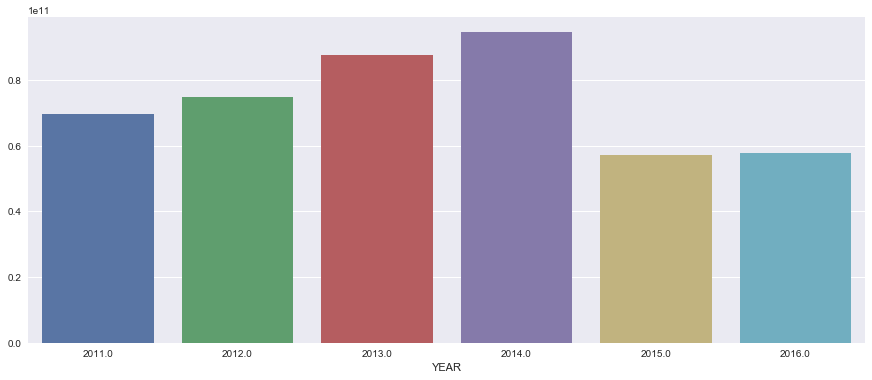

In [191]:
plt.figure(figsize=(15,6))
sns.barplot(x=wage.index,y=wage.values)
plt.show()

## Prevailing wage is highest in the year 2014

In [132]:
work = data['WORKSITE'].value_counts()
place = work[(work.values>10000)]

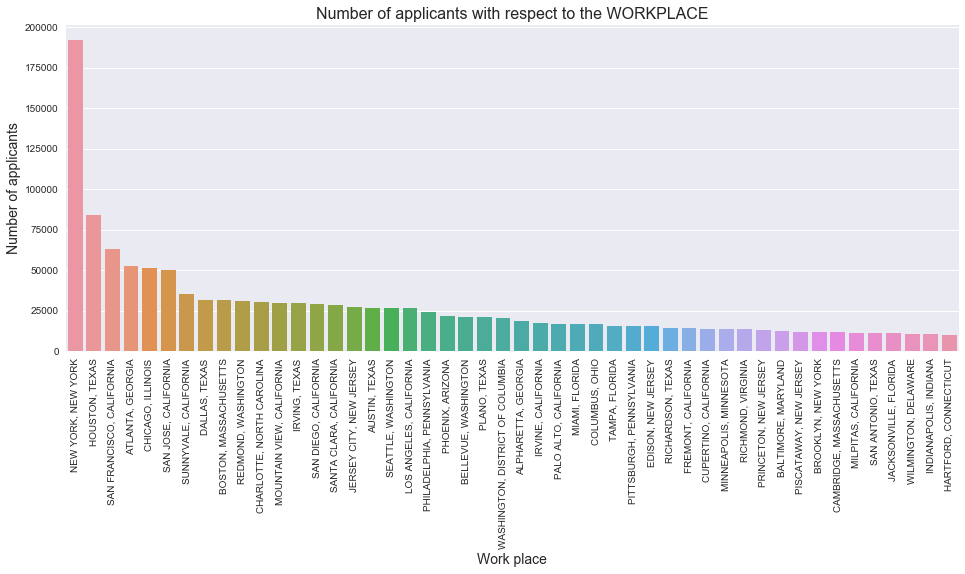

In [137]:
plt.figure(figsize=(16,6))
sns.barplot(place.index, place.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Work place', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the WORKPLACE", fontsize=16)
plt.show()

## New York is the major destination workplace in USA